In [10]:
# Import pustaka yang diperlukan

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
df_copy = df.copy()
df_copy

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
# 1. Cek data yang hilang

print("Cek data yang hilang:")
print(df_copy.isnull().sum())

Cek data yang hilang:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
# 2. Cek outlier

Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_copy[(df_copy['Spending Score (1-100)'] < lower) | (df_copy['Spending Score (1-100)'] > upper)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [13]:
# 3. Encoding kolom Gender

label_encoder = LabelEncoder()
df_copy['Gender'] = label_encoder.fit_transform(df_copy['Gender'])
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
# 4. Normalisasi kolom Annual Income dan Spending Score

scaler = MinMaxScaler()
df_copy[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_copy[['Annual Income (k$)', 'Spending Score (1-100)']])
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959


In [15]:
# 5. Pembagian dataset menjadi data pelatihan dan pengujian

X = df_copy.drop(columns=['CustomerID', 'Spending Score (1-100)'])
y = df_copy[['Spending Score (1-100)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape Data Pelatihan:")
print(X_train.shape, y_train.shape)

print("\nShape Data Pengujian:")
print(X_test.shape, y_test.shape)


Shape Data Pelatihan:
(160, 3) (160, 1)

Shape Data Pengujian:
(40, 3) (40, 1)


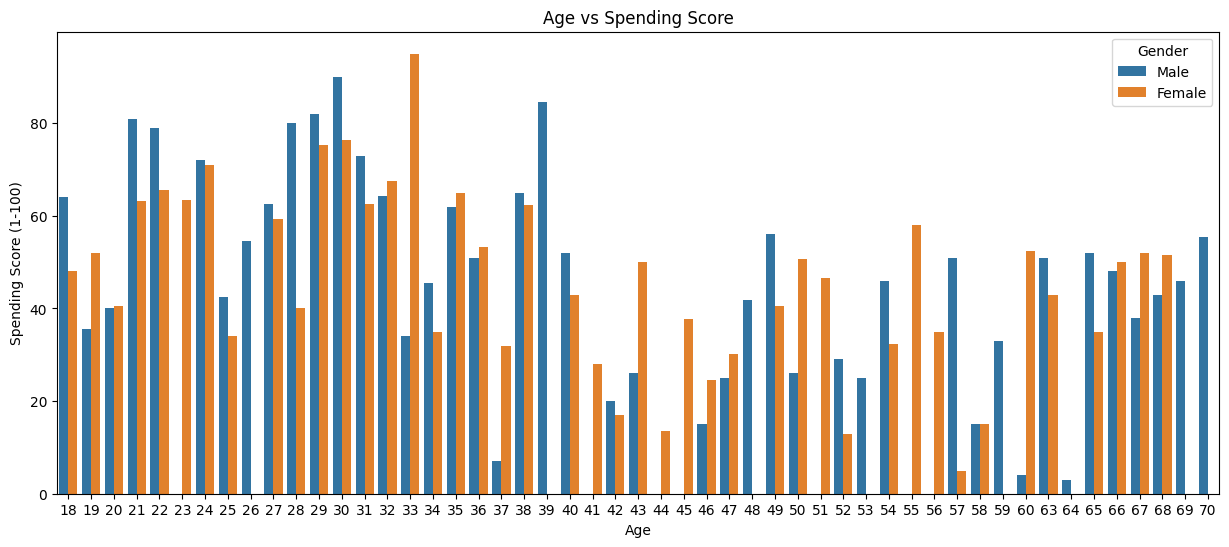

In [16]:
# 6. Analisis data spending score dan age berdasarkan gender

df_copy["Gender"] = label_encoder.inverse_transform(df_copy["Gender"])
df_copy[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.inverse_transform(df_copy[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Spending Score (1-100)', hue = "Gender", data=df_copy, errorbar = None)
plt.title('Age vs Spending Score')
plt.show()

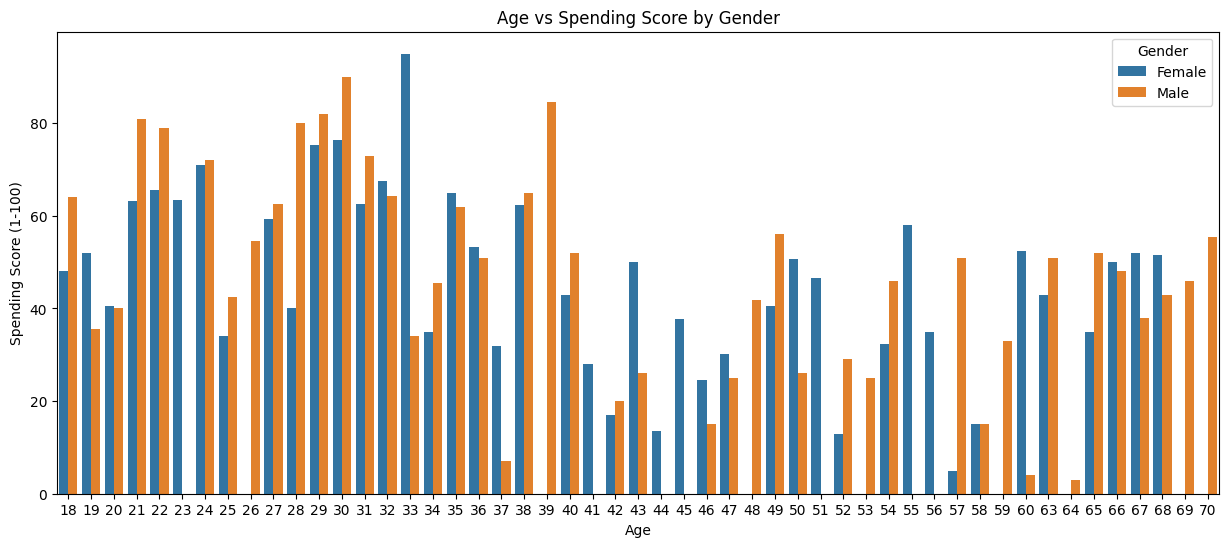

In [17]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv("Mall_Customers.csv")
df_copy = df.copy()

# 3. One-Hot Encoding kolom Gender
df_copy = pd.get_dummies(df_copy, columns=['Gender'], drop_first=True)  # Menggunakan drop_first untuk menghindari dummy variable trap
df_copy.head()  # Tampilkan beberapa baris pertama untuk memastikan perubahan

# 4. Normalisasi kolom Annual Income dan Spending Score
scaler = MinMaxScaler()
df_copy[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_copy[['Annual Income (k$)', 'Spending Score (1-100)']])

X = df_copy.drop(columns=['CustomerID', 'Spending Score (1-100)'])
y = df_copy[['Spending Score (1-100)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Analisis data Spending Score dan Age berdasarkan Gender
df_copy[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.inverse_transform(df_copy[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='Spending Score (1-100)', hue='Gender_Male', data=df_copy, errorbar=None)
plt.title('Age vs Spending Score by Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [18]:
df_copy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15.0,39.0,True
1,2,21,15.0,81.0,True
2,3,20,16.0,6.0,False
3,4,23,16.0,77.0,False
4,5,31,17.0,40.0,False
...,...,...,...,...,...
195,196,35,120.0,79.0,False
196,197,45,126.0,28.0,False
197,198,32,126.0,74.0,True
198,199,32,137.0,18.0,True
